<a href="https://colab.research.google.com/github/kungfumas/stbi/blob/master/Google_Search_Trends_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Set Up

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import datetime

In [ ]:
!pip install pytrends

In [ ]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq(hl='en-US', tz=300, geo='ID')

# Top charts

In [ ]:
# Get Google Top Charts
df = pytrend.top_charts(date=2020, hl='en-US', tz=300, geo='ID')
df

,title,exploreQuery
0,Ghosting,
1,Gabut,
2,Lockdown,
3,Rebahan,
4,WFH,
5,Resesi,
6,Kuota Belajar,
7,Virus Corona,
8,PSBB,
9,Among Us,


In [ ]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='indonesia')
df

,0
0,Union Berlin vs Dortmund
1,Karen Nijsen
2,MONSTA X
3,Parma vs Juventus
4,Bilbao vs Huesca
5,The Boy
6,Sheff utd vs man utd
7,Sweet Home
8,Roma vs Torino
9,Eryck Amaral


# Deepdive Top Searches

In [ ]:
kw_list = ['ghosting','gabut','lockdown','rebahan','wfh','resesi','kuota belajar','virus corona','psbb','among us']

In [ ]:
trends_df = pd.DataFrame()
for i in kw_list:
   ##build out query
   temp_df = pd.DataFrame()
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
   
   ##save trend to dictionary
   temp_df = pytrend.interest_over_time()
   temp_df['kw'] = i
   temp_df.reset_index(level=0, inplace=True)
   temp_df.columns = ['date', 'value', 'isPartial', 'kw']

   trends_df = pd.concat([trends_df,temp_df[['date','value','kw']]])

trends_df

,date,value,kw
0,2020-01-05,7,ghosting
1,2020-01-12,9,ghosting
2,2020-01-19,4,ghosting
3,2020-01-26,10,ghosting
4,2020-02-02,3,ghosting
...,...,...,...
43,2020-11-01,40,among us
44,2020-11-08,32,among us
45,2020-11-15,26,among us
46,2020-11-22,25,among us


In [ ]:
trends_df['date'] = pd.to_datetime(trends_df.date,format='%Y-%m-%d')

In [ ]:
def func(row):
    if row['kw'] == 'gabut':
        return 'gabut, rebahan'
    elif row['kw'] =='rebahan':
        return 'gabut, rebahan' 
    elif row['kw'] =='psbb':
        return 'psbb, lockdown' 
    elif row['kw'] =='lockdown':
        return 'psbb, lockdown' 
    else:
        return row['kw']

trends_df['group'] = trends_df.apply(func, axis=1)

Text(0.5, 1.0, 'Trend Score by Keyword')

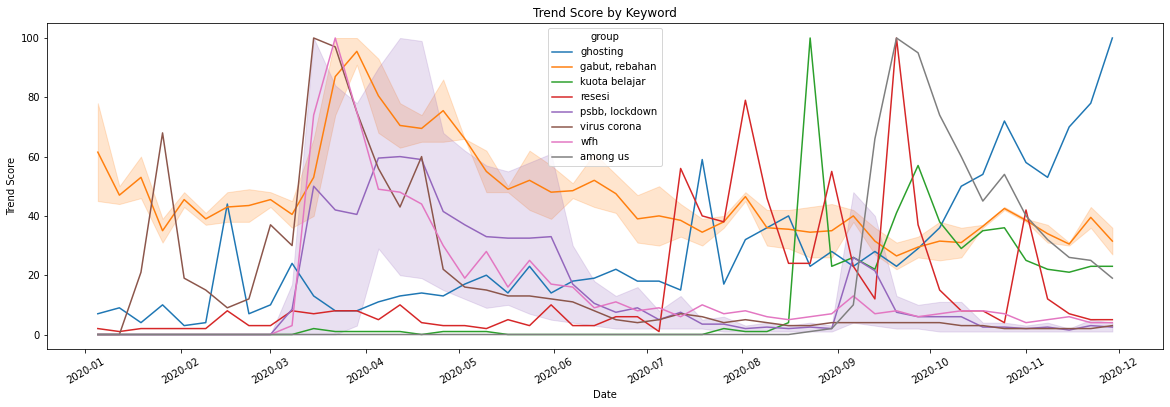

In [ ]:
# create plot

f, ax = plt.subplots(figsize=(20, 6))

sns.set_color_codes("pastel")
sns.lineplot(x="date", y="value", data=trends_df.sort_values("date", ascending=True), hue="group",
            color="b")

plt.xlabel('Date')
plt.ylabel('Trend Score')
plt.xticks(rotation=30)
plt.title('Trend Score by Keyword')

# Covid deepdive

## Search by Region

### Exploration

In [ ]:
kw_list = ['ghosting','gabut','lockdown','rebahan','wfh','resesi','kuota belajar','virus corona','psbb','among us']

city_df = pd.DataFrame()
for i in kw_list:
   ##build out query
   temp_df = pd.DataFrame()
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
   
   ##save trend to dictionary
   temp_df = pytrend.interest_by_region(resolution='CITY', inc_low_vol=True, inc_geo_code=False)
   temp_df['kw'] = i
   temp_df.reset_index(level=0, inplace=True)
   temp_df.columns = ['geoname', 'value', 'kw']

   city_df = pd.concat([city_df,temp_df[['geoname','value','kw']]])

city_df

,geoname,value,kw
0,Aceh,19,ghosting
1,Bali,42,ghosting
2,Bangka Belitung Islands,24,ghosting
3,Banten,75,ghosting
4,Bengkulu,90,ghosting
...,...,...,...
29,West Kalimantan,99,among us
30,West Nusa Tenggara,58,among us
31,West Papua,65,among us
32,West Sulawesi,50,among us


In [ ]:
city_df.geoname.unique()

array(['Aceh', 'Bali', 'Bangka Belitung Islands', 'Banten', 'Bengkulu',
       'Central Java', 'Central Kalimantan', 'Central Sulawesi',
       'East Java', 'East Kalimantan', 'East Nusa Tenggara', 'Gorontalo',
       'Jambi', 'Lampung', 'Maluku', 'North Kalimantan', 'North Maluku',
       'North Sulawesi', 'North Sumatra', 'Papua', 'Riau', 'Riau Islands',
       'South East Sulawesi', 'South Kalimantan', 'South Sulawesi',
       'South Sumatra', 'Special Capital Region of Jakarta',
       'Special Region of Yogyakarta', 'West Java', 'West Kalimantan',
       'West Nusa Tenggara', 'West Papua', 'West Sulawesi',
       'West Sumatra'], dtype=object)

In [ ]:
def region_name(row):
    if row['geoname'] == 'Special Capital Region of Jakarta':
        return 'Jakarta'
    elif row['geoname'] =='Banten' or row['geoname'] =='Central Java' or row['geoname'] =='East Java' or row['geoname'] =='West Java' or row['geoname'] =='Special Region of Yogyakarta':
        return 'Java excl Jakarta' 
    elif row['geoname'] =='Aceh' or row['geoname'] =='Bangka Belitung Islands' or row['geoname'] =='Bengkulu' or row['geoname'] =='Jambi' or row['geoname'] =='Lampung' or row['geoname'] =='North Sumatra' or row['geoname'] =='Riau' or row['geoname'] =='Riau Islands' or row['geoname'] =='South Sumatra' or row['geoname'] =='West Sumatra':
        return 'Sumatera' 
    elif row['geoname'] =='Central Sulawesi' or row['geoname'] =='Gorontalo' or row['geoname'] =='North Sulawesi' or row['geoname'] =='South East Sulawesi' or row['geoname'] =='South Sulawesi' or row['geoname'] =='West Sulawesi':
        return 'Sulawesi' 
    elif row['geoname'] =='Central Kalimantan' or row['geoname'] =='East Kalimantan' or row['geoname'] =='North Kalimantan' or row['geoname'] =='South Kalimantan' or row['geoname'] =='West Kalimantan':
        return 'Kalimantan'
    elif row['geoname'] =='Bali' or row['geoname'] =='East Nusa Tenggara' or row['geoname'] =='Maluku' or row['geoname'] =='North Maluku' or row['geoname'] =='Papua' or row['geoname'] =='West Nusa Tenggara' or row['geoname'] =='West Papua':
        return 'Nusa Tenggara & Papua'  
    else:
        return 'others'

city_df['region'] = city_df.apply(region_name, axis=1)
city_df

,geoname,value,kw,region
0,Aceh,19,ghosting,Sumatera
1,Bali,42,ghosting,Nusa Tenggara & Papua
2,Bangka Belitung Islands,24,ghosting,Sumatera
3,Banten,75,ghosting,Java excl Jakarta
4,Bengkulu,90,ghosting,Sumatera
...,...,...,...,...
29,West Kalimantan,99,among us,Kalimantan
30,West Nusa Tenggara,58,among us,Nusa Tenggara & Papua
31,West Papua,65,among us,Nusa Tenggara & Papua
32,West Sulawesi,50,among us,Sulawesi


In [ ]:
region_df = pd.DataFrame()
region_df = city_df.groupby(['region','kw']).value.mean().reset_index()
region_df.head()

,region,kw,value
0,Jakarta,among us,71.0
1,Jakarta,gabut,24.0
2,Jakarta,ghosting,58.0
3,Jakarta,kuota belajar,23.0
4,Jakarta,lockdown,100.0


### Result

In [ ]:
!pip install squarify

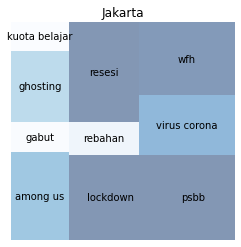

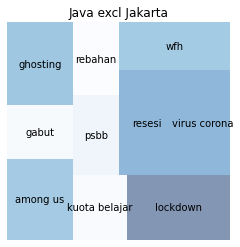

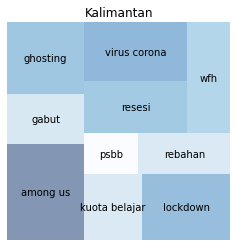

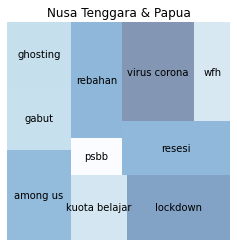

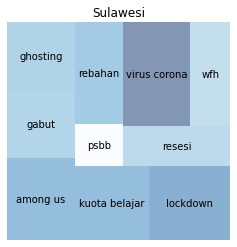

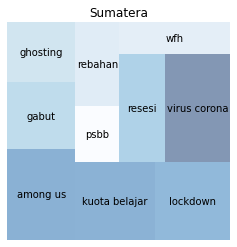

In [ ]:
import matplotlib
import squarify # pip install squarify

for i in region_df.region.unique():
  temp_city_df = region_df.loc[region_df['region'] == i]

  # create a color palette, mapped to these values
  cmap = matplotlib.cm.Blues
  mini=min(temp_city_df['value'])
  maxi=max(temp_city_df['value'])
  norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
  colors = [cmap(norm(value)) for value in temp_city_df['value']]

  fig, ax = plt.subplots(1, figsize = (4,4))
  squarify.plot(sizes=temp_city_df['value'], 
                label=temp_city_df['kw'], 
                alpha=.5,
                color = colors)
  plt.title(i)
  plt.axis('off')
  plt.show()

## Related Queries and Topics

### Exploration

In [ ]:
# Get Google Keyword Suggestions
pytrend.build_payload(kw_list=['virus corona'], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
keywords = pytrend.suggestions(keyword='virus corona')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid') 

,title,type
0,Coronavirus,Virus
1,Coronavirus disease 2019,Disease
2,Severe acute respiratory syndrome coronavirus 2,Virus
3,2020 coronavirus pandemic in Singapore,Event
4,Coronavirus party,Topic


In [ ]:
kw_list = ['ghosting','gabut','lockdown','rebahan','wfh','resesi','kuota belajar','virus corona','psbb','among us']

suggestion = pd.DataFrame()
for i in kw_list:
   ##build out query
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
   
   ##save trend to dictionary
   temp_df = pd.DataFrame(pytrend.suggestions(keyword=i))
   temp_df['kw'] = i
   temp_df.reset_index(level=0, inplace=False)

   suggestion = pd.concat([suggestion,temp_df])

suggestion

,mid,title,type,kw
0,/g/11b7_r92z7,Ghosting,Topic,ghosting
1,/m/0hr7nv3,Shadow banning,Topic,ghosting
2,/m/09d8d8,Ghosting,Topic,ghosting
3,/g/120x601v,Ghosting,Musical group,ghosting
4,/g/11g24xc_zh,The Right Swipe: A Novel,Topic,ghosting
0,/g/11f006g5p1,Gaji buta,Topic,gabut
1,/g/11cspvhy2b,Gabutto,"Brazilian restaurant in Tokyo, Japan",gabut
2,/g/1tjbqxr4,Gabut. shoe company,Topic,gabut
0,/m/07l88z,Lockdown,Topic,lockdown
1,/m/012659r0,12 Rounds 3: Lockdown,2015 film,lockdown


In [ ]:
# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()

In [ ]:
kw = 'virus corona'
# for rising related queries
related_queries_rising = related_queries.get(kw).get('rising')
# for top related queries
related_queries_top = related_queries.get(kw).get('top')

In [ ]:
related_queries_rising

,query,value
0,virus corona indonesia,1092750
1,corona di indonesia,746500
2,virus corona di indonesia,713150
3,tentang virus corona,697500
4,virus corona gejala,610500
5,gejala gejala virus corona,596100
6,gejala corona,589850
7,ciri virus corona,486100
8,ciri ciri corona virus,478750
9,covid 19,362150


In [ ]:
related_queries_top

,query,value
0,virus corona indonesia,100
1,apa virus corona,72
2,corona di indonesia,68
3,virus corona di indonesia,65
4,tentang virus corona,64
5,virus corona gejala,56
6,gejala gejala virus corona,55
7,gejala corona,54
8,gambar corona,46
9,gambar virus corona,45


In [ ]:
df_clean = pd.DataFrame()
df_clean = related_queries_top
df_clean['clean_query'] = df_clean['query'].str.replace('virus', '').str.replace('corona', '')
df_clean

,query,value,clean_query
0,virus corona indonesia,100,indonesia
1,apa virus corona,72,apa
2,corona di indonesia,68,di indonesia
3,virus corona di indonesia,65,di indonesia
4,tentang virus corona,64,tentang
5,virus corona gejala,56,gejala
6,gejala gejala virus corona,55,gejala gejala
7,gejala corona,54,gejala
8,gambar corona,46,gambar
9,gambar virus corona,45,gambar


In [ ]:
df_clean["clean_query"]=df_clean["clean_query"].str.split(" ")
df_clean = df_clean.explode("clean_query").reset_index(drop=True)
df_clean

,query,value,clean_query
0,virus corona indonesia,100,
1,virus corona indonesia,100,
2,virus corona indonesia,100,indonesia
3,apa virus corona,72,apa
4,apa virus corona,72,
...,...,...,...
68,mencegah virus corona,22,
69,korona,22,korona
70,berita virus corona,22,berita
71,berita virus corona,22,


In [ ]:
df_cloud = pd.DataFrame(df_clean.groupby(['clean_query']).value.sum()).reset_index()
df_cloud

,clean_query,value
0,,1773
1,19,33
2,adalah,39
3,apa,150
4,apakah,27
5,berita,22
6,ciri,132
7,covid,33
8,di,133
9,gambar,91


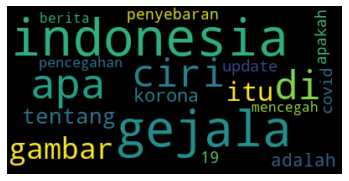

In [ ]:
d = {}
for a, x in df_cloud.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
kw_list = ['ghosting','gabut','lockdown','rebahan','wfh','resesi','kuota belajar','virus corona','psbb','among us']

related_df = pd.DataFrame()
for i in kw_list:
   # Related Queries, returns a dictionary of dataframes
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
   related_queries = pytrend.related_queries()
   related_queries_top = related_queries.get(i).get('top')
   
   ##save trend to dictionary
   temp_df = pd.DataFrame()
   temp_df = related_queries_top
   temp_df['clean_query'] = temp_df['query'].str.replace(i, '').str.split(" ")
   temp_df = temp_df.explode("clean_query").reset_index(drop=True)
   temp_df['kw'] = i
   temp_df.reset_index(level=0, inplace=False)

   temp_sum_df = pd.DataFrame()
   temp_sum_df['kw'] = i
   temp_sum_df = pd.DataFrame(temp_df.groupby(['clean_query','kw']).value.sum()).reset_index()

   related_df = pd.concat([related_df,temp_sum_df])

related_df

,clean_query,kw,value
0,,ghosting,363
1,adalah,ghosting,111
2,apa,ghosting,109
3,arti,ghosting,65
4,artinya,ghosting,62
...,...,...,...
12,nama,among us,26
13,pc,among us,45
14,pink,among us,14
15,skin,among us,20


### Result

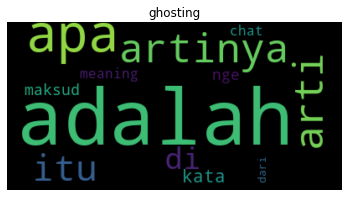

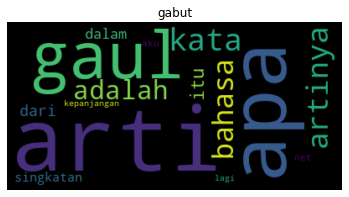

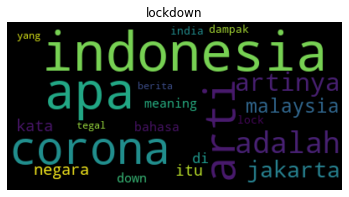

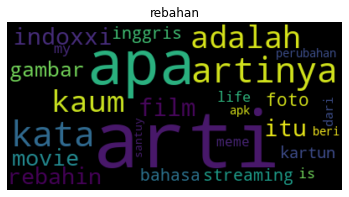

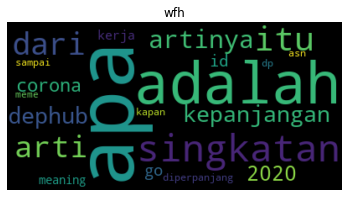

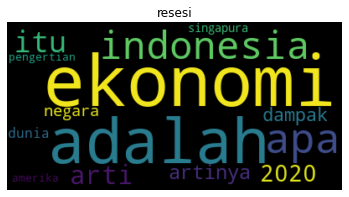

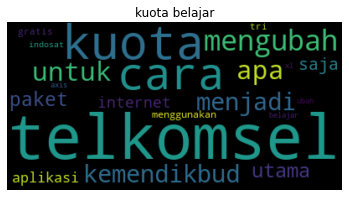

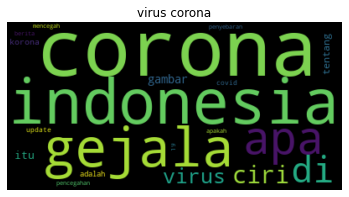

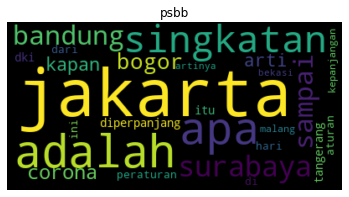

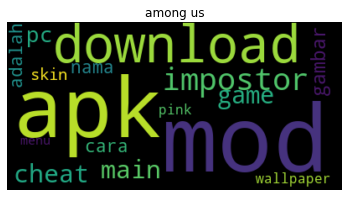

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for i in related_df.kw.unique():
  df_cloud = related_df.loc[related_df['kw'] == i]
  df_cloud = df_cloud.drop(columns= 'kw') 

  d = {}
  for a, x in df_cloud.values:
      d[a] = x

  wordcloud = WordCloud()
  wordcloud.generate_from_frequencies(frequencies=d)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.title(i)
  plt.show()

In [ ]:
kw = 'virus corona'
# for rising related topics
related_topics_rising = related_topics.get(kw).get('rising')
# for top related topics
related_topics_top = related_topics.get(kw).get('top')

In [ ]:
related_topics_rising

,value,formattedValue,link,topic_mid,topic_title,topic_type
0,191600,Breakout,/trends/explore?q=/m/08k8jt&date=2020-01-01+20...,/m/08k8jt,Casualty,Person
1,178750,Breakout,/trends/explore?q=/m/0400g4&date=2020-01-01+20...,/m/0400g4,Preventive healthcare,Topic
2,169850,Breakout,/trends/explore?q=/m/0hn9s&date=2020-01-01+202...,/m/0hn9s,Epidemic,Topic
3,103550,Breakout,/trends/explore?q=/m/036991&date=2020-01-01+20...,/m/036991,Transmission,Topic
4,91750,Breakout,/trends/explore?q=/m/0l3cy&date=2020-01-01+202...,/m/0l3cy,Wuhan,City in China
5,170,+170%,/trends/explore?q=/m/0g9pc&date=2020-01-01+202...,/m/0g9pc,Virus,Infectious agent
6,170,+170%,/trends/explore?q=/m/01cpyy&date=2020-01-01+20...,/m/01cpyy,Coronavirus,Virus


In [ ]:
related_topics_top

,value,formattedValue,hasData,link,topic_mid,topic_title,topic_type
0,100,100,True,/trends/explore?q=/m/0g9pc&date=2020-01-01+202...,/m/0g9pc,Virus,Infectious agent
1,99,99,True,/trends/explore?q=/m/01cpyy&date=2020-01-01+20...,/m/01cpyy,Coronavirus,Virus
2,6,6,True,/trends/explore?q=/m/01b_06&date=2020-01-01+20...,/m/01b_06,Symptom,Topic
3,2,2,True,/trends/explore?q=/m/08k8jt&date=2020-01-01+20...,/m/08k8jt,Casualty,Person
4,2,2,True,/trends/explore?q=/m/0400g4&date=2020-01-01+20...,/m/0400g4,Preventive healthcare,Topic
5,2,2,True,/trends/explore?q=/m/0hn9s&date=2020-01-01+202...,/m/0hn9s,Epidemic,Topic
6,1,1,True,/trends/explore?q=/m/036991&date=2020-01-01+20...,/m/036991,Transmission,Topic
7,1,1,True,/trends/explore?q=/m/0l3cy&date=2020-01-01+202...,/m/0l3cy,Wuhan,City in China


# Other Interesting Trend

## Bintang Emon

In [ ]:
# Get Google Keyword Suggestions
pytrend.build_payload(kw_list=['bintang emon'], geo='ID', cat=0,timeframe='2020-01-01 2020-12-20')
related_queries = pytrend.related_queries()
df_bintang_emon = pd.DataFrame(related_queries.get('bintang emon').get('top'))
# df_bintang_emon['terms'] = df_bintang_emon['query'].str.replace('bintang emon', '')
df_bintang_emon

,query,value
0,bintang emon kasus,100
1,bintang emon twitter,77
2,bintang emon narkoba,50
3,bintang emon novel baswedan,44
4,bintang emon komika,39
5,bintang emon ig,33
6,biodata bintang emon,28
7,bintang emon terbaru,22
8,bintang emon difitnah,16
9,pacar bintang emon,16


In [ ]:
trends_bintang_emon = pd.DataFrame()
kw = df_bintang_emon['query'].tolist()

for i in kw:
   ##build out query
   temp_df = pd.DataFrame()
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
   
   ##save trend to dictionary
   temp_df = pytrend.interest_over_time()
   temp_df['kw'] = i
   temp_df['terms'] = temp_df['kw'].str.replace('bintang emon', '').str.strip()
   temp_df.reset_index(level=0, inplace=True)
   temp_df.columns = ['date', 'value', 'isPartial', 'kw', 'terms']

   trends_bintang_emon = pd.concat([trends_bintang_emon,temp_df[['date','value','kw', 'terms']]])

trends_bintang_emon

,date,value,kw,terms
0,2020-01-05,0,bintang emon kasus,kasus
1,2020-01-12,0,bintang emon kasus,kasus
2,2020-01-19,0,bintang emon kasus,kasus
3,2020-01-26,0,bintang emon kasus,kasus
4,2020-02-02,0,bintang emon kasus,kasus
...,...,...,...,...
43,2020-11-01,83,umur bintang emon,umur
44,2020-11-08,0,umur bintang emon,umur
45,2020-11-15,0,umur bintang emon,umur
46,2020-11-22,85,umur bintang emon,umur


In [ ]:
print(df_bintang_emon['query'].tolist())

['bintang emon kasus', 'bintang emon twitter', 'bintang emon narkoba', 'bintang emon novel baswedan', 'bintang emon komika', 'bintang emon ig', 'biodata bintang emon', 'bintang emon terbaru', 'bintang emon difitnah', 'pacar bintang emon', 'bintang emon kenapa', 'profil bintang emon', 'siapa bintang emon', 'nama asli bintang emon', 'umur bintang emon']


In [ ]:
def func_group(row):
    if row['terms'] == 'profil' or row['terms'] == 'biodata' or row['terms'] == 'nama asli' or row['terms'] == 'umur' or row['terms'] == 'siapa' or row['terms'] == 'komika':
        return 'profile'
    elif row['terms'] =='twitter' or row['terms'] == 'ig':
        return 'social media' 
    else:
        return row['terms']

trends_bintang_emon['group'] = trends_bintang_emon.apply(func_group, axis=1)

Text(0.5, 1.0, 'Trend Score by Keyword')

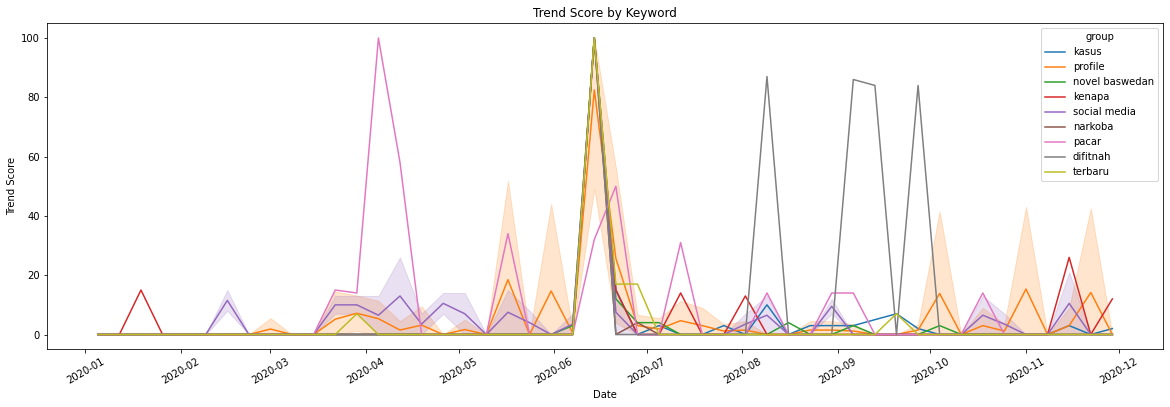

In [ ]:
# create plot
f, ax = plt.subplots(figsize=(20, 6))

sns.set_color_codes("pastel")
sns.lineplot(x="date", y="value", data=trends_bintang_emon.sort_values("date", ascending=True), hue="group",
            color="b")

plt.xlabel('Date')
plt.ylabel('Trend Score')
plt.xticks(rotation=30)
plt.title('Trend Score by Keyword')

## What People Do

In [ ]:
# Get Google Keyword Suggestions
pytrend.build_payload(kw_list=['cara'], geo='ID', cat=0,timeframe='2020-01-01 2020-12-20')
related_queries = pytrend.related_queries()
df_cara = pd.DataFrame(related_queries.get('cara').get('rising'))

df_cara

,query,value
0,cara daftar prakerja,17900
1,cara daftar kartu prakerja,12150
2,cara mencegah virus corona,7200
3,cara daftar bantuan umkm,6250
4,cara membuat hand sanitizer,5300
5,cara cek bantuan umkm,3700
6,cara membuat dalgona coffee,2750
7,cara mendapatkan token listrik gratis,2600
8,cara mendaftar kartu prakerja,2300
9,cara menggugurkan kandungan dan mempercepat haid,550


In [ ]:
trends_df = pd.DataFrame()
kw = df_cara['query'].tolist()

for i in kw:
   ##build out query
   temp_df = pd.DataFrame()
   pytrend.build_payload([i], geo='ID', cat=0,timeframe='2020-01-01 2020-12-01')
   
   ##save trend to dictionary
   temp_df = pytrend.interest_over_time()
   temp_df['kw'] = i
   temp_df['terms'] = temp_df['kw'].str.replace('cara', '').str.replace('bagaimana', '').str.strip()
   temp_df.reset_index(level=0, inplace=True)
   temp_df.columns = ['date', 'value', 'isPartial', 'kw', 'terms']

   trends_df = pd.concat([trends_df,temp_df[['date','value','kw', 'terms']]])

trends_df

,date,value,kw,terms
0,2020-01-05,0,cara daftar prakerja,daftar prakerja
1,2020-01-12,0,cara daftar prakerja,daftar prakerja
2,2020-01-19,0,cara daftar prakerja,daftar prakerja
3,2020-01-26,0,cara daftar prakerja,daftar prakerja
4,2020-02-02,0,cara daftar prakerja,daftar prakerja
...,...,...,...,...
43,2020-11-01,47,cara wudhu,wudhu
44,2020-11-08,51,cara wudhu,wudhu
45,2020-11-15,52,cara wudhu,wudhu
46,2020-11-22,60,cara wudhu,wudhu


In [ ]:
trends_df['terms'].unique()

array(['daftar prakerja', 'daftar kartu prakerja',
       'mencegah virus corona', 'daftar bantuan umkm',
       'membuat hand sanitizer', 'cek bantuan umkm',
       'membuat dalgona coffee', 'mendapatkan token listrik gratis',
       'mendaftar kartu prakerja',
       'menggugurkan kandungan dan mempercepat haid',
       'membuat soal di google form', 'membuat boba',
       'mendapatkan kuota gratis', 'mandi wajib dan doanya',
       'tata  sholat idul fitri', 'sholat idul fitri',
       'screenshot di laptop', 'menyadap wa pasangan di hp kita',
       'membuat cireng', 'membuat cimol', 'membuat martabak manis', '',
       'membuat donat', 'menghilangkan bruntusan', 'wudhu'], dtype=object)

In [ ]:
def func_group_l1(row):
    if row['terms'] == 'daftar prakerja' or row['terms'] == 'daftar kartu prakerja' or row['terms'] == 'mendaftar kartu prakerja':
        return 'prakerja'
    elif row['terms'] =='daftar bantuan umkm' or row['terms'] == 'cek bantuan umkm':
        return 'bantuan umkm' 
    elif row['terms'] =='tata  sholat idul fitri' or row['terms'] == 'sholat idul fitri':
        return 'sholat idul fitri' 
    else:
        return row['terms']

trends_df['group_l1'] = trends_df.apply(func_group_l1, axis=1)
trends_df

,date,value,kw,terms,group_l1
0,2020-01-05,0,cara daftar prakerja,daftar prakerja,prakerja
1,2020-01-12,0,cara daftar prakerja,daftar prakerja,prakerja
2,2020-01-19,0,cara daftar prakerja,daftar prakerja,prakerja
3,2020-01-26,0,cara daftar prakerja,daftar prakerja,prakerja
4,2020-02-02,0,cara daftar prakerja,daftar prakerja,prakerja
...,...,...,...,...,...
43,2020-11-01,47,cara wudhu,wudhu,wudhu
44,2020-11-08,51,cara wudhu,wudhu,wudhu
45,2020-11-15,52,cara wudhu,wudhu,wudhu
46,2020-11-22,60,cara wudhu,wudhu,wudhu


In [ ]:
trends_df['group_l1'].unique()

array(['prakerja', 'mencegah virus corona', 'bantuan umkm',
       'membuat hand sanitizer', 'membuat dalgona coffee',
       'mendapatkan token listrik gratis',
       'menggugurkan kandungan dan mempercepat haid',
       'membuat soal di google form', 'membuat boba',
       'mendapatkan kuota gratis', 'mandi wajib dan doanya',
       'sholat idul fitri', 'screenshot di laptop',
       'menyadap wa pasangan di hp kita', 'membuat cireng',
       'membuat cimol', 'membuat martabak manis', '', 'membuat donat',
       'menghilangkan bruntusan', 'wudhu'], dtype=object)

In [ ]:
def func_group_l2(row):
    if row['group_l1'] == 'prakerja' or row['group_l1'] == 'bantuan umkm':
        return 'work support'
    elif row['group_l1'] =='mencegah virus corona' or row['group_l1'] == 'membuat hand sanitizer':
        return 'covid' 
    elif row['group_l1'] =='mendapatkan token listrik gratis' or row['group_l1'] == 'membuat soal di google form' or row['group_l1'] == 'mendapatkan kuota gratis' or row['group_l1'] == 'creenshot di laptop':
        return 'wfh' 
    elif row['group_l1'] =='sholat idul fitri' or row['group_l1'] == 'mandi wajib dan doanya' or row['group_l1'] == 'wudhu' or row['group_l1'] == 'mandi wajib dan doanya':
        return 'religious' 
    elif row['group_l1'] =='membuat dalgona coffee' or row['group_l1'] == 'membuat boba' or row['group_l1'] == 'membuat cireng' or row['group_l1'] == 'membuat cireng' or row['group_l1'] == 'membuat cimol' or row['group_l1'] == 'membuat martabak manis' or row['group_l1'] == 'membuat donat':
        return 'cooking' 
    else:
        return 'others'

trends_df['group_l2'] = trends_df.apply(func_group_l2, axis=1)
trends_df

,date,value,kw,terms,group_l1,group_l2
0,2020-01-05,0,cara daftar prakerja,daftar prakerja,prakerja,work support
1,2020-01-12,0,cara daftar prakerja,daftar prakerja,prakerja,work support
2,2020-01-19,0,cara daftar prakerja,daftar prakerja,prakerja,work support
3,2020-01-26,0,cara daftar prakerja,daftar prakerja,prakerja,work support
4,2020-02-02,0,cara daftar prakerja,daftar prakerja,prakerja,work support
...,...,...,...,...,...,...
43,2020-11-01,47,cara wudhu,wudhu,wudhu,religious
44,2020-11-08,51,cara wudhu,wudhu,wudhu,religious
45,2020-11-15,52,cara wudhu,wudhu,wudhu,religious
46,2020-11-22,60,cara wudhu,wudhu,wudhu,religious


Text(0.5, 1.0, "'How To' Searches - Indonesia")

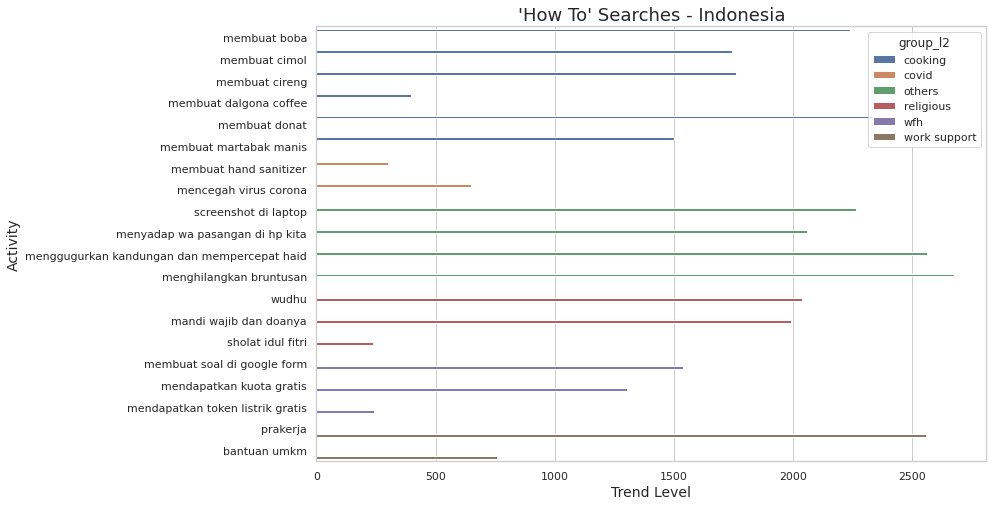

In [ ]:
trends_df = trends_df.loc[trends_df['kw'] != 'bagaimana cara']
data = trends_df.groupby(['group_l1','group_l2']).value.sum().reset_index()

f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x="value", 
            y="group_l1", 
            hue="group_l2", 
            data=data.sort_values("group_l2", ascending=True))
plt.ylabel("Activity", size=14)
plt.xlabel("Trend Level", size=14)
plt.title("'How To' Searches - Indonesia", size=18)